In [0]:
df[].corr()

In [0]:
sns.heatmap(df[].corr(), cmap='coolwarm')

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 0 한글 폰트

In [3]:
!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"
!unzip "NotoSansCJKkr-hinted.zip"

--2020-03-08 13:04:44--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 173.194.217.128, 2607:f8b0:400c:c13::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip’

NotoSansCJKkr-hinte 100%[===================>] 115.55M  82.1MB/s    in 1.4s    

2020-03-08 13:04:51 (82.1 MB/s) - ‘NotoSansCJKkr-hinted.zip’ saved [121163981/121163981]

Archive:  NotoSansCJKkr-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: NotoSansCJKkr-DemiLight.otf  
  inflating: NotoSansCJKkr-Light.otf  
  inflating: NotoSansCJKkr-Medium.otf  
  inflating: NotoSansCJKkr-Regular.otf  
  inflating: NotoSansCJKkr-T

In [0]:
!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

In [0]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = "Noto Sans CJK KR"

# 1. 데이터 읽기 

Contents of the Notebook:
Part1: Exploratory Data Analysis(EDA):

1)Analysis of the features.

2)Finding any relations or trends considering multiple features.
Part2: Feature Engineering and Data Cleaning:

1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.
Part3: Predictive Modeling

1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction

# 1. 데이터 불러오기

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_dir = "/content/drive/My Drive/" + "_data/data_dacon/temperature_forecasts/"

In [8]:
df = pd.read_csv(data_dir+'train.csv')
df.shape

(4752, 60)

* 4320개(30일)
* 432개(3일) 

# 2 데이터 살펴보기

|-|30일(train)|3일(train)|80일(test)|
|---|---|---|---|
|Y18|NULL|432개|NULL|
|Y00-Y17|4320개|NULL|NULL|
|X00-X17|4320개|432개|11520개|

In [0]:
n = 4320

## 데이터 보기

In [33]:
df.head(10)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.0,87.7,0.0,0.0,115.9,0.0,294.1,0.1,0.0,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.0,214.0,0.0,77.5,64.5,0.0,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.0,88.9,0.0,0.0,124.7,0.0,0.0,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.0,174.9,0.0,78.0,65.0,0.0,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN
5,5,9.1,988.9,1.3,0.7,0.0,1009.1,989.6,12.0,1010.0,1010.0,0.0,0.0,90.7,222.0,0.0,174.2,0.0,0.0,0.2,0.0,94.6,0.0,1002.3,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,75.7,7.3,9.1,1010.1,0.0,243.1,0.0,78.7,65.1,0.0,12.0,10.5,10.5,19.0,19.0,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.0,9.0,8.5,7.0,8.5,NaN
6,6,9.1,988.8,2.4,1.9,0.0,1009.1,989.6,12.0,1010.1,1010.0,0.0,0.0,90.2,257.8,0.0,168.9,0.0,0.0,0.3,0.0,94.9,0.0,1002.3,1009.6,0.0,0.0,0.0,1008.7,11.8,1001.4,79.0,7.1,8.6,1010.1,0.0,195.8,0.0,78.6,65.5,0.0,12.0,10.0,10.0,19.0,19.0,9.0,8.0,9.0,8.5,5.5,6.5,5.5,7.5,9.0,8.5,8.0,7.0,8.0,NaN
7,7,8.9,988.9,1.0,1.2,0.0,1009.2,989.7,11.9,1010.1,1010.1,0.0,0.0,91.9,226.4,0.0,112.8,0.0,0.0,0.4,0.0,95.0,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,11.8,1001.5,78.2,7.1,8.8,1010.1,0.0,262.7,0.0,78.6,65.7,0.0,12.0,10.0,10.0,19.0,19.0,9.0,8.0,9.0,8.5,5.5,6.0,5.5,7.5,9.0,8.5,8.0,7.0,8.0,NaN
8,8,9.0,988.9,1.5,0.1,0.0,1009.2,989.6,11.9,1010.0,1010.1,0.0,0.0,92.2,215.0,0.0,157.4,0.0,0.0,0.6,0.0,95.5,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,11.6,1001.5,77.5,7.0,8.8,1010.1,0.0,236.1,0.0,78.8,66.5,0.0,12.0,10.0,10.0,19.0,19.0,9.0,8.0,9.0,8.0,5.0,6.0,5.0,7.0,9.0,8.5,8.0,7.0,8.0,NaN
9,9,8.8,988.9,1.4,0.4,0.0,1009.4,989.6,11.8,1010.1,1010.1,0.0,0.0,92.7,214.4,0.0,134.0,0.0,0.0,0.6,0.0,95.6,0.0,1002.5,1009.7,0.0,0.0,0.0,1008.6,11.5,1001.5,79.3,7.1,8.5,1010.0,0.0,230.9,0.0,78.8,67.6,0.0,12.0,10.0,9.5,18.5,18.5,9.0,8.0,9.0,8.0,4.5,5.5,5.0,7.0,8.5,8.5,8.0,7.0,8.0,NaN


In [34]:
df.tail(10)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
4742,4742,20.9,987.7,0.2,2.0,0.0,1006.6,987.8,22.2,1007.7,1007.4,2.5,23.88,93.6,29.2,0.0,201.1,0.0,168.1,0.9,0.0,86.8,10.5,1000.1,1007.6,0.4,271.0,1.4,1006.0,24.5,999.6,89.2,18.5,19.6,1007.6,22.16,152.3,0.0,79.0,56.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.5
4743,4743,20.8,987.6,2.6,2.0,0.0,1006.8,987.6,22.0,1007.3,1007.3,2.5,23.88,94.0,14.8,0.0,135.6,0.0,148.7,1.3,0.0,87.1,10.5,1000.3,1007.4,0.0,0.0,1.2,1006.0,24.2,999.4,88.8,18.2,19.5,1007.6,22.16,147.4,0.0,79.4,56.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
4744,4744,20.5,987.7,1.1,2.0,0.0,1006.8,987.8,21.9,1007.7,1007.4,2.5,23.88,94.5,304.7,0.0,227.1,0.0,267.7,0.7,0.0,88.0,10.5,1000.3,1007.4,1.6,113.4,0.6,1006.1,24.3,999.4,89.7,18.0,19.7,1007.7,22.16,149.1,0.0,80.4,56.4,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
4745,4745,20.2,987.8,1.1,1.6,0.0,1006.9,987.8,21.7,1007.7,1007.6,2.5,23.88,94.7,222.9,0.0,224.2,0.0,235.1,0.4,0.0,92.1,10.5,1000.4,1007.5,0.4,124.2,1.0,1006.1,24.2,999.4,88.6,17.8,19.6,1007.7,22.16,184.5,0.0,81.5,56.4,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
4746,4746,20.1,987.9,0.3,1.1,0.0,1006.9,987.7,21.7,1007.4,1007.7,2.5,23.88,95.2,298.4,0.0,234.9,0.0,240.1,0.9,0.0,90.8,10.5,1000.4,1007.5,0.0,0.0,1.3,1006.1,24.1,999.4,88.6,17.7,19.5,1007.7,22.16,215.2,0.0,82.1,56.9,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
4747,4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,1007.4,2.5,23.88,95.3,333.1,0.0,274.9,0.0,275.5,0.9,0.0,89.7,10.5,1000.4,1007.5,0.0,0.0,1.2,1006.0,23.8,999.4,89.9,17.7,19.1,1007.5,22.16,218.6,0.0,82.3,58.6,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4748,4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,1007.4,2.5,23.88,95.6,216.4,0.0,277.3,0.0,247.0,1.0,0.0,90.1,10.5,1000.3,1007.5,0.0,0.0,1.3,1006.0,23.6,999.4,91.3,17.7,19.2,1007.5,22.16,161.7,0.0,82.5,59.1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,1007.5,2.5,23.88,95.9,127.8,0.0,256.1,0.0,299.1,0.6,0.0,90.8,10.5,1000.4,1007.6,0.0,0.0,0.2,1006.0,23.6,999.5,90.2,17.8,19.2,1007.5,22.16,254.2,0.0,83.0,58.9,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,1007.5,2.5,23.88,95.9,323.8,0.0,255.1,0.0,0.0,0.6,0.0,91.5,10.5,1000.4,1007.6,0.0,0.0,0.1,1006.0,23.3,999.5,90.1,17.7,19.3,1007.6,22.16,300.0,0.0,83.2,59.8,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4751,4751,19.1,987.6,1.0,0.3,0.0,1006.8,987.8,21.2,1007.5,1007.4,2.5,23.88,96.2,0.0,0.0,237.2,0.0,17.7,0.0,0.0,93.0,10.5,1000.3,1007.6,0.0,0.0,0.1,1006.1,23.2,999.5,89.6,17.7,19.5,1007.7,22.16,157.5,0.0,84.0,59.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0


## id



```
temp = 'X13, X15, X17, X25, X35'
for i in temp.split(', '):
    print("'{}',".format(i), end=' ')
```



In [35]:
pd.DataFrame(df['id']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 1 columns):
id    4752 non-null int64
dtypes: int64(1)
memory usage: 37.2 KB


## x

* feat_temp: 기온 
* feat_air_press: 현지기압
* feat_wind_speed: 풍속
* feat_rainfall: 일일 누적강수량 
* feat_sea_press: 해면기압
* feat_insol: 일일 누적일사량
* feat_humid: 습도
* feat_dir_wind: 풍향



In [0]:
#feat_x = [feat_temp, feat_air_press, feat_wind_speed, feat_rainfall, feat_sea_press, feat_insol, feat_humid, feat_dir_wind]
feat_x = ['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09', 
          'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 
          'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 
          'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39']
feat_temp = ['X00', 'X07', 'X28', 'X31', 'X32']
feat_air_press = ['X01', 'X06', 'X22', 'X27', 'X29']
feat_wind_speed = ['X02', 'X03', 'X18', 'X24', 'X26']
feat_rainfall = ['X04', 'X10', 'X21', 'X36', 'X39']
feat_sea_press = ['X05', 'X08', 'X09', 'X23', 'X33']
feat_insol = ['X11', 'X14', 'X16', 'X19', 'X34']
feat_humid = ['X12', 'X20', 'X30', 'X37', 'X38']
feat_dir_wind = ['X13', 'X15', 'X17', 'X25', 'X35']

In [74]:
df[feat_x].head(2)

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0


### 기온

In [107]:
df[feat_temp].describe()

,X00,X07,X28,X31,X32
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,20.227904,21.658081,22.079040,19.846528,20.012984
std,4.707570,4.377216,4.225203,5.520259,5.271630
min,8.300000,11.600000,10.300000,5.300000,5.500000
25%,16.900000,18.400000,19.000000,16.000000,16.300000
50%,19.900000,21.200000,21.700000,19.400000,19.600000
75%,24.100000,24.825000,25.200000,24.100000,24.100000
max,30.900000,32.700000,33.200000,33.100000,32.900000


In [73]:
df[feat_temp].corr()

,X00,X07,X28,X31,X32
X00,1.000000,0.957922,0.941699,0.961053,0.963055
X07,0.957922,1.000000,0.981081,0.954865,0.962826
X28,0.941699,0.981081,1.000000,0.935156,0.938572
X31,0.961053,0.954865,0.935156,1.000000,0.979312
X32,0.963055,0.962826,0.938572,0.979312,1.000000


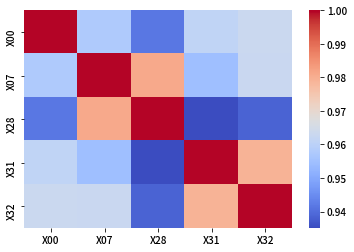

In [77]:
sns.heatmap(df[feat_temp].corr(), cmap='coolwarm')

### 현지기압

In [108]:
df[feat_air_press].describe()

,X01,X06,X22,X27,X29
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,988.621107,989.005093,1001.773190,1007.554924,1000.811932
std,3.359916,3.403714,3.367735,3.446475,3.390206
min,977.300000,978.100000,990.800000,997.200000,989.700000
25%,986.800000,987.100000,999.900000,1005.500000,998.900000
50%,988.600000,989.100000,1001.900000,1007.700000,1000.900000
75%,991.000000,991.600000,1004.200000,1010.200000,1003.400000
max,997.200000,997.400000,1010.100000,1015.400000,1009.000000


In [78]:
df[feat_air_press].corr()

,X01,X06,X22,X27,X29
X01,1.000000,0.995284,0.996746,0.987752,0.996157
X06,0.995284,1.000000,0.994807,0.995303,0.997819
X22,0.996746,0.994807,1.000000,0.991352,0.997923
X27,0.987752,0.995303,0.991352,1.000000,0.995237
X29,0.996157,0.997819,0.997923,0.995237,1.000000


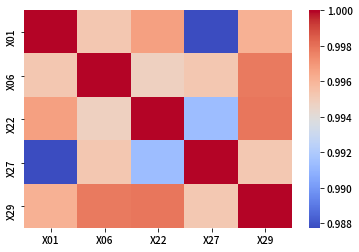

In [79]:
sns.heatmap(df[feat_air_press].corr(), cmap='coolwarm')

### 풍속

In [111]:
df[feat_wind_speed].describe()

,X02,X03,X18,X24,X26
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,1.509764,1.453157,1.377462,0.985059,1.369886
std,1.071858,0.936151,1.155024,1.091314,1.240900
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.700000,0.800000,0.500000,0.000000,0.300000
50%,1.300000,1.300000,1.000000,0.700000,1.100000
75%,2.100000,2.000000,2.100000,1.700000,2.100000
max,10.200000,5.800000,8.900000,6.000000,6.800000


In [110]:
df[feat_wind_speed].corr()

,X02,X03,X18,X24,X26
X02,1.000000,0.384300,0.357250,0.417393,0.400025
X03,0.384300,1.000000,0.481811,0.500993,0.537470
X18,0.357250,0.481811,1.000000,0.607754,0.623131
X24,0.417393,0.500993,0.607754,1.000000,0.634738
X26,0.400025,0.537470,0.623131,0.634738,1.000000


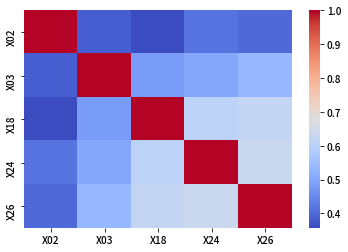

In [81]:
sns.heatmap(df[feat_wind_speed].corr(), cmap='coolwarm')

### 일일 누적강수량

In [112]:
df[feat_rainfall].describe()

,X04,X10,X21,X36,X39
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,1.270223,1.006734,1.138363,1.533817,1.083123
std,4.429852,3.324415,4.079039,5.578607,4.617366
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.600000,18.500000,21.000000,33.600000,28.000000


In [82]:
df[feat_rainfall].corr()

,X04,X10,X21,X36,X39
X04,1.000000,0.815176,0.934104,0.986345,0.747254
X10,0.815176,1.000000,0.796809,0.740117,0.813190
X21,0.934104,0.796809,1.000000,0.904654,0.868231
X36,0.986345,0.740117,0.904654,1.000000,0.676623
X39,0.747254,0.813190,0.868231,0.676623,1.000000


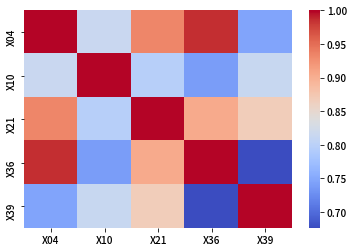

In [98]:
sns.heatmap(df[feat_rainfall].corr(), cmap='coolwarm')

### 해면기압

In [113]:
df[feat_sea_press].describe()

,X05,X08,X09,X23,X33
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,1008.333902,1008.790341,1008.394171,1008.850989,1009.074747
std,3.395037,3.520317,3.546180,3.417633,3.440669
min,997.200000,997.300000,996.300000,997.500000,998.700000
25%,1006.500000,1006.700000,1006.300000,1006.900000,1007.075000
50%,1008.500000,1008.800000,1008.400000,1008.900000,1009.200000
75%,1010.800000,1011.400000,1010.900000,1011.400000,1011.700000
max,1016.800000,1017.500000,1018.000000,1017.100000,1016.800000


In [84]:
df[feat_sea_press].corr()

,X05,X08,X09,X23,X33
X05,1.000000,0.991330,0.989875,0.997819,0.990969
X08,0.991330,1.000000,0.991651,0.994129,0.988586
X09,0.989875,0.991651,1.000000,0.988561,0.977810
X23,0.997819,0.994129,0.988561,1.000000,0.994468
X33,0.990969,0.988586,0.977810,0.994468,1.000000


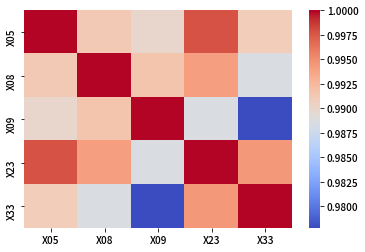

In [85]:
sns.heatmap(df[feat_sea_press].corr(), cmap='coolwarm')

### 일일 누적일사량

X14, 16, 19는 일사량이 전부 0이다.  
일일 누적일사량을 사용하지 않는 것도 방법일 것이다. 

In [114]:
df[feat_insol].describe()

,X11,X14,X16,X19,X34
count,4752.000000,4752.0,4752.0,4752.0,4752.000000
mean,11.008479,0.0,0.0,0.0,11.567563
std,10.873539,0.0,0.0,0.0,11.386727
min,0.000000,0.0,0.0,0.0,0.000000
25%,0.020000,0.0,0.0,0.0,0.030000
50%,7.690000,0.0,0.0,0.0,8.210000
75%,22.190000,0.0,0.0,0.0,22.562500
max,30.700000,0.0,0.0,0.0,32.240000


In [86]:
df[feat_insol].corr()

,X11,X14,X16,X19,X34
X11,1.000000,NaN,NaN,NaN,0.995187
X14,NaN,NaN,NaN,NaN,NaN
X16,NaN,NaN,NaN,NaN,NaN
X19,NaN,NaN,NaN,NaN,NaN
X34,0.995187,NaN,NaN,NaN,1.000000


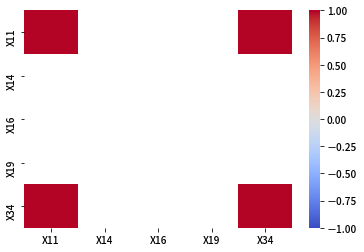

In [96]:
sns.heatmap(df[feat_insol].corr(), cmap='coolwarm')

### 습도

In [115]:
df[feat_humid].describe()

,X12,X20,X30,X37,X38
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,68.209827,71.478872,65.657639,65.918771,58.178704
std,22.278053,21.830446,21.525699,19.527173,18.368285
min,16.400000,19.700000,17.400000,17.500000,17.900000
25%,49.500000,53.075000,48.075000,51.500000,44.600000
50%,72.150000,74.200000,69.400000,67.300000,59.100000
75%,89.025000,92.600000,85.600000,81.900000,72.700000
max,97.900000,97.900000,97.200000,97.800000,94.800000


In [100]:
df[feat_humid].corr()

,X12,X20,X30,X37,X38
X12,1.000000,0.937239,0.952855,0.908078,0.853899
X20,0.937239,1.000000,0.928021,0.900590,0.855513
X30,0.952855,0.928021,1.000000,0.921706,0.851052
X37,0.908078,0.900590,0.921706,1.000000,0.931389
X38,0.853899,0.855513,0.851052,0.931389,1.000000


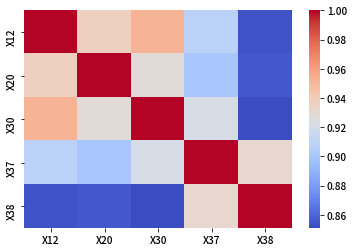

In [99]:
sns.heatmap(df[feat_humid].corr(), cmap='coolwarm')

### 풍향

In [116]:
df[feat_dir_wind].describe()

,X13,X15,X17,X25,X35
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,161.357639,174.346654,161.823864,139.524453,208.400505
std,98.787460,97.785811,115.943382,131.438036,99.580562
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.225000,115.600000,33.875000,0.000000,155.300000
50%,182.600000,170.250000,190.450000,134.150000,240.850000
75%,228.925000,258.400000,253.125000,270.900000,277.800000
max,360.000000,359.900000,360.000000,359.900000,359.900000


In [101]:
df[feat_dir_wind].corr()

,X13,X15,X17,X25,X35
X13,1.000000,0.120568,-0.003977,0.029207,0.053072
X15,0.120568,1.000000,0.133061,0.144404,0.093405
X17,-0.003977,0.133061,1.000000,0.354239,0.205332
X25,0.029207,0.144404,0.354239,1.000000,0.303246
X35,0.053072,0.093405,0.205332,0.303246,1.000000


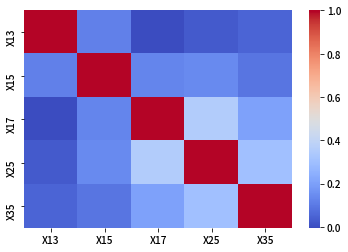

In [102]:
sns.heatmap(df[feat_dir_wind].corr(), cmap='coolwarm')

## y

### feat_y

In [0]:
feat_y = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17']

In [121]:
df[feat_y].shape

(4752, 18)

null 값이 없는 부분만 추출 

In [124]:
df_y = df[feat_y][:n]
df_y.shape 

(4320, 18)

In [126]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 18 columns):
Y00    4320 non-null float64
Y01    4320 non-null float64
Y02    4320 non-null float64
Y03    4320 non-null float64
Y04    4320 non-null float64
Y05    4320 non-null float64
Y06    4320 non-null float64
Y07    4320 non-null float64
Y08    4320 non-null float64
Y09    4320 non-null float64
Y10    4320 non-null float64
Y11    4320 non-null float64
Y12    4320 non-null float64
Y13    4320 non-null float64
Y14    4320 non-null float64
Y15    4320 non-null float64
Y16    4320 non-null float64
Y17    4320 non-null float64
dtypes: float64(18)
memory usage: 607.6 KB


In [137]:
df_y.describe().round(1)

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
count,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0
mean,21.3,23.7,23.6,24.5,24.5,24.2,22.5,23.8,24.0,22.2,23.7,24.6,23.6,20.9,21.3,21.6,23.0,23.4
std,4.3,7.6,7.4,3.3,3.4,8.6,7.5,8.7,9.8,9.1,10.6,12.2,8.4,6.1,7.1,6.8,8.1,9.3
min,11.5,7.0,7.0,16.0,15.5,7.5,6.5,7.5,7.0,3.5,4.0,3.0,6.0,7.5,7.5,7.0,6.0,7.0
25%,18.0,17.5,17.5,22.0,22.0,17.5,16.5,17.0,17.0,15.5,15.5,15.0,17.0,16.5,16.5,16.5,16.5,16.0
50%,21.0,22.0,22.0,24.5,24.5,22.0,21.0,21.5,21.0,20.0,20.5,21.0,22.0,19.5,19.5,20.0,21.5,20.0
75%,24.5,30.0,29.5,27.0,27.0,30.0,28.5,29.5,29.0,30.5,32.5,34.5,30.5,25.0,25.0,27.0,30.0,32.0
max,32.0,40.5,39.5,32.0,33.0,53.0,45.0,52.0,54.5,42.0,49.0,53.0,43.5,38.0,42.5,40.5,41.5,43.5


### y correlation

y를 비슷한 것끼리 그룹화 해보기 

In [143]:
df_y.corr().round(3)

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
Y00,1.000,0.945,0.947,0.921,0.920,0.818,0.690,0.586,0.837,0.851,0.870,0.844,0.663,0.910,0.898,0.827,0.799,0.798
Y01,0.945,1.000,0.996,0.807,0.808,0.913,0.800,0.700,0.933,0.954,0.968,0.960,0.786,0.967,0.943,0.920,0.909,0.920
Y02,0.947,0.996,1.000,0.804,0.805,0.912,0.814,0.719,0.928,0.956,0.965,0.960,0.796,0.965,0.936,0.927,0.913,0.921
Y03,0.921,0.807,0.804,1.000,0.997,0.612,0.437,0.323,0.661,0.639,0.677,0.639,0.404,0.738,0.757,0.606,0.564,0.570
Y04,0.920,0.808,0.805,0.997,1.000,0.612,0.436,0.323,0.661,0.639,0.677,0.638,0.403,0.737,0.760,0.604,0.563,0.572
Y05,0.818,0.913,0.912,0.612,0.612,1.000,0.840,0.765,0.959,0.939,0.934,0.946,0.848,0.945,0.916,0.910,0.948,0.925
Y06,0.690,0.800,0.814,0.437,0.436,0.840,1.000,0.965,0.759,0.907,0.866,0.871,0.981,0.815,0.721,0.925,0.942,0.909
Y07,0.586,0.700,0.719,0.323,0.323,0.765,0.965,1.000,0.664,0.829,0.776,0.787,0.957,0.715,0.627,0.855,0.874,0.852
Y08,0.837,0.933,0.928,0.661,0.661,0.959,0.759,0.664,1.000,0.931,0.941,0.951,0.765,0.966,0.954,0.894,0.909,0.918
Y09,0.851,0.954,0.956,0.639,0.639,0.939,0.907,0.829,0.931,1.000,0.991,0.987,0.894,0.960,0.904,0.976,0.970,0.980


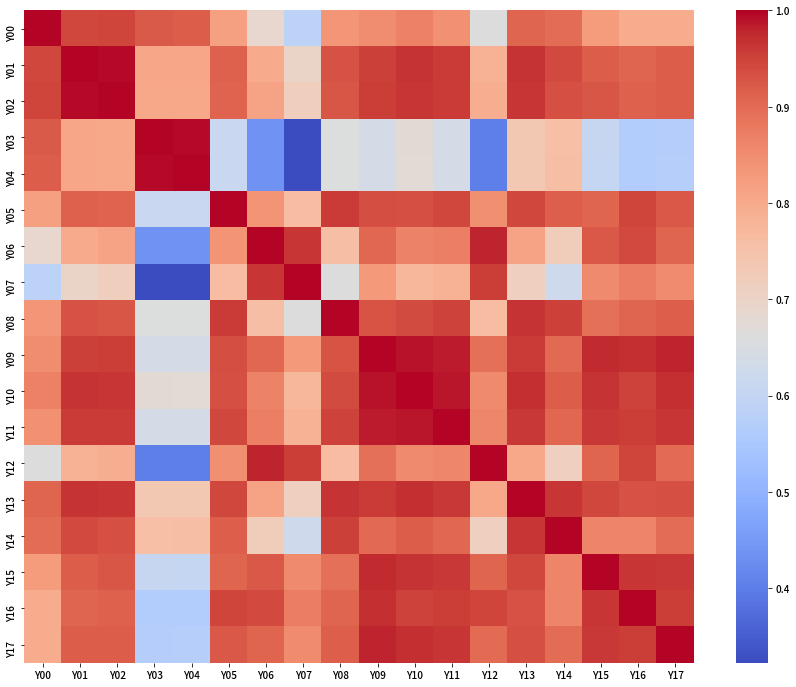

In [141]:
plt.figure(figsize=(15,12))
ax = sns.heatmap(df_y.corr(), cmap='coolwarm')

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
Y00,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Y01,0,111,111,0,0,0,0,0,0,0,111,0,0,111,0,0,0,0
Y02,0,111,111,0,0,0,0,0,0,0,111,0,0,111,0,0,0,0
Y03,0,0,0,111,111,0,0,0,0,0,0,0,0,0,0,0,0,0
Y04,0,0,0,111,111,0,0,0,0,0,0,0,0,0,0,0,0,0
Y05,0,0,0,0,0,111,0,0,0,0,0,0,0,0,0,0,0,0
Y06,0,0,0,0,0,0,111,111,0,0,0,0,111,0,0,0,0,0
Y07,0,0,0,0,0,0,111,111,0,0,0,0,0,0,0,0,0,0
Y08,0,0,0,0,0,0,0,0,111,0,0,0,0,111,0,0,0,0
Y09,0,0,0,0,0,0,0,0,0,111,111,111,0,0,0,111,111,111


4개의 그룹으로 나눠볼 수 있음  
'Y03', 'Y04'  
'Y00'  
'Y14', 'Y05', 'Y08', 'Y13','Y01', 'Y02', 'Y09', 'Y10', 'Y11', 'Y17', 'Y15',  Y16'  
 'Y12', 'Y06', 'Y07'



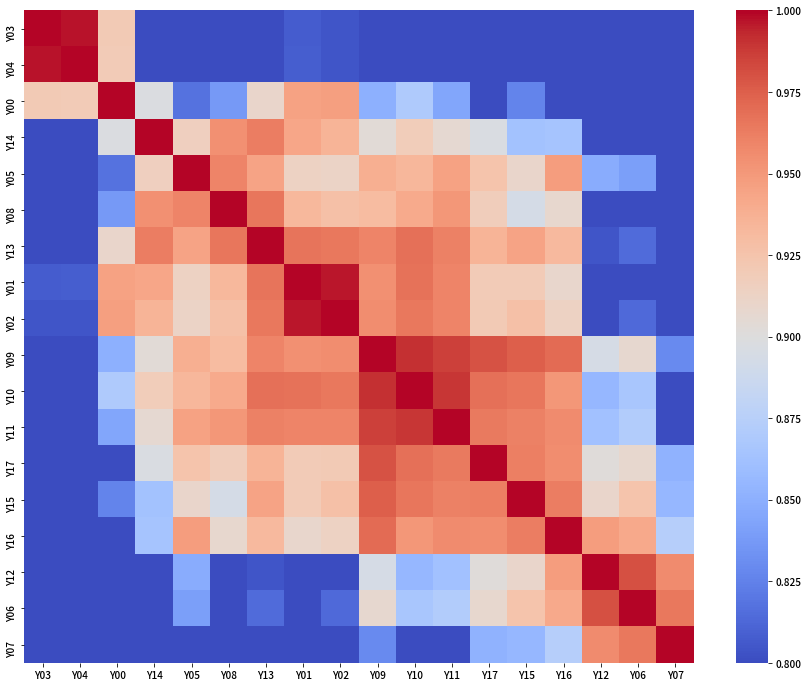

In [251]:
df_y_ = df_y[['Y03', 'Y04', 'Y00', 'Y14', 'Y05', 'Y08', 'Y13','Y01', 'Y02', 'Y09', 'Y10', 'Y11', 'Y17', 'Y15', 'Y16', 'Y12', 'Y06', 'Y07']]

plt.figure(figsize=(15,12))
ax = sns.heatmap(df_y_.corr(), cmap='coolwarm', vmin = 0.8) # 명확하게 보기 위해 vmin 지정해 보았음

In [245]:
pd.DataFrame(df_y_.corr()>0.95, dtype=int)*111

,Y03,Y04,Y00,Y14,Y08,Y13,Y05,Y01,Y02,Y09,Y10,Y11,Y17,Y15,Y16,Y12,Y06,Y07
Y03,111,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Y04,111,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Y00,0,0,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Y14,0,0,0,111,111,111,0,0,0,0,0,0,0,0,0,0,0,0
Y08,0,0,0,111,111,111,111,0,0,0,0,111,0,0,0,0,0,0
Y13,0,0,0,111,111,111,0,111,111,111,111,111,0,0,0,0,0,0
Y05,0,0,0,0,111,0,111,0,0,0,0,0,0,0,0,0,0,0
Y01,0,0,0,0,0,111,0,111,111,111,111,111,0,0,0,0,0,0
Y02,0,0,0,0,0,111,0,111,111,111,111,111,0,0,0,0,0,0
Y09,0,0,0,0,0,111,0,111,111,111,111,111,111,111,111,0,0,0


## x[feat_temp],  y

In [174]:
df[feat_temp+['Y07']][:n].corr()['Y07'][:-1]

X00    0.746129
X07    0.698961
X28    0.652907
X31    0.743822
X32    0.763417
Name: Y07, dtype: float64

In [168]:
df[feat_temp+['Y01']][:n].isnull().sum()

X00    0
X07    0
X28    0
X31    0
X32    0
Y01    0
dtype: int64

### ㄹㄹ 

In [165]:
feat_temp

['X00', 'X07', 'X28', 'X31', 'X32']

In [0]:
df[].corr()

In [0]:
sns.heatmap(df[].corr(), cmap='coolwarm')

In [0]:
df[].corr()

In [0]:
sns.heatmap(df[].corr(), cmap='coolwarm')

In [117]:
temp = 'X13, X15, X17, X25, X35'
for i in range(18):
    print("'Y{:02}',".format(i), end=' ')

'Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 

In [0]:
temp = 'X13, X15, X17, X25, X35'
for i in temp.split(', '):
    print("'{}',".format(i), end=' ')